In [15]:
from keras.models import load_model
from keras.utils import to_categorical
import json
import sys
import numpy as np
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
annotations = None
with open('annot-max.json') as f:
    annotations=json.load(f)

In [17]:
annotations

{'like1': {'bboxes': [[0.3296875,
    0.5333333333333333,
    0.11875,
    0.2611111111111111]],
  'labels': ['like']},
 'like2': {'bboxes': [[0.415625, 0.9111111111111111, 0.134375, -0.25]],
  'labels': ['like']},
 'like3': {'bboxes': [[0.41875,
    0.4861111111111111,
    -0.1078125,
    -0.2611111111111111]],
  'labels': ['like']},
 'dislike1': {'bboxes': [[0.465625,
    0.44722222222222224,
    -0.0875,
    0.2722222222222222]],
  'labels': ['dislike']},
 'dislike2': {'bboxes': [[0.3328125, 0.65, 0.121875, -0.39166666666666666]],
  'labels': ['dislike']},
 'dislike3': {'bboxes': [[0.38125,
    0.5916666666666667,
    0.1078125,
    -0.31666666666666665]],
  'labels': ['dislike']},
 'peace1': {'bboxes': [[0.359375, 0.3111111111111111, -0.15625, 0.375]],
  'labels': ['peace']},
 'peace2': {'bboxes': [[0.2390625, 0.6, 0.14375, -0.3055555555555556]],
  'labels': ['peace']},
 'peace3': {'bboxes': [[0.3015625, 0.8333333333333334, 0.128125, -0.325]],
  'labels': ['peace']},
 'rock1': {'bb

 19%|█▉        | 3/16 [00:00<00:00, 28.20it/s]

dislike1.jpg
[[0.465625, 0.44722222222222224, -0.0875, 0.2722222222222222]]
(294, 168, 3)
dislike2.jpg
[[0.3328125, 0.65, 0.121875, -0.39166666666666666]]
(423, 234, 3)
dislike3.jpg
[[0.38125, 0.5916666666666667, 0.1078125, -0.31666666666666665]]
(342, 207, 3)
gesture_detection.ipynb
Error
like1.jpg
[[0.3296875, 0.5333333333333333, 0.11875, 0.2611111111111111]]
(282, 228, 3)
like2.jpg
[[0.415625, 0.9111111111111111, 0.134375, -0.25]]
(270, 258, 3)
like3.jpg
[[0.41875, 0.4861111111111111, -0.1078125, -0.2611111111111111]]
(282, 207, 3)
peace1.jpg


 75%|███████▌  | 12/16 [00:00<00:00, 33.09it/s]

[[0.359375, 0.3111111111111111, -0.15625, 0.375]]
(405, 300, 3)
peace2.jpg
[[0.2390625, 0.6, 0.14375, -0.3055555555555556]]
(330, 276, 3)
peace3.jpg
[[0.3015625, 0.8333333333333334, 0.128125, -0.325]]
(351, 245, 3)
rock1.jpg
[[0.2484375, 0.7055555555555556, 0.165625, -0.3388888888888889]]
(366, 318, 3)
rock2.jpg
[[0.2671875, 0.48333333333333334, 0.1625, -0.2916666666666667]]
(315, 312, 3)
rock3.jpg
[[0.2484375, 0.6166666666666667, 0.134375, -0.3388888888888889]]
(366, 258, 3)
stop1.jpg
[[0.1921875, 0.7277777777777777, 0.2359375, -0.575]]
(621, 453, 3)
stop2.jpg


100%|██████████| 16/16 [00:00<00:00, 34.08it/s]


[[0.4234375, 0.35555555555555557, -0.140625, 0.375]]
(405, 270, 3)
stop3.jpg
[[0.4484375, 0.24166666666666667, -0.209375, 0.5805555555555556]]
(627, 402, 3)


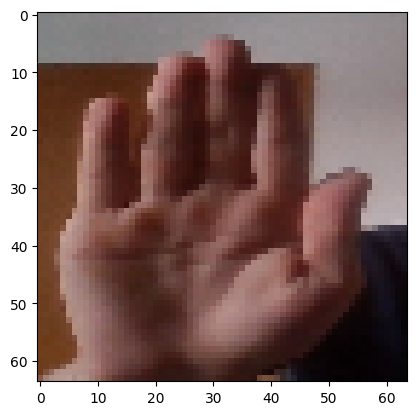

In [28]:
PATH = "imgs"

images = []
labels = []
SIZE = (64,64)
label_names = ['like', 'no_gesture', 'stop', 'dislike', 'rock', 'peace']
for filename in tqdm(os.listdir(f'{PATH}')):
    print(filename)
    img = cv2.imread(f'{PATH}/{filename}')
    if img is None:
        print("Error")
        continue
    plt.imshow(img)
    try:
        UID = filename.split('.')[0]
        annotation = annotations[UID]
    except Exception as e:
        print(e)
        continue
    
    print(annotation['bboxes'])
    # iterate over all hands annotated in the image
    for i, bbox in enumerate(annotation['bboxes']):
        # annotated bounding boxes are in the range from 0 to 1
        # therefore we have to scale them to the image size
        x1 = int(bbox[0] * img.shape[1])
        y1 = int(bbox[1] * img.shape[0])
        w = int(bbox[2] * img.shape[1])
        h = int(bbox[3] * img.shape[0])
        x2 = x1 + w
        y2 = y1 + h
        

        # crop image to the bounding box and apply pre-processing
        crop = img[min(y1,y2):max(y1,y2), min(x1,x2):max(x1,x2)]
        print(crop.shape)
        
        img_resized = cv2.resize(crop, SIZE)
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
        plt.imshow(img_resized)
        # get the annotated hand's label
        # if we have not seen this label yet, add it to the list of labels
        label = annotation['labels'][i]
        label_index = label_names.index(label)
        
        images.append(img_resized)
        labels.append(label_index)

In [29]:
images = np.array(images).astype('float32')
images = images/255
images = images.reshape(-1,SIZE[0], SIZE[1], 3)
#labels = to_categorical(labels)


In [30]:
model = load_model("gesture_recognition_5_gestures.keras")

In [32]:
# let the model make predictions for our training data
y_predictions = model.predict(images)
print(images.shape)

# we get a 2D numpy array with probabilities for each category
print('before', y_predictions)

# to build a confusion matrix, we have to convert it to classifications
# this can be done by using the argmax() function to set the probability to 1 and the rest to 0
y_predictions = np.argmax(y_predictions, axis=1)

print('probabilities', y_predictions)
print('labels', labels)

# create and plot confusion matrix
conf_matrix = confusion_matrix(labels, y_predictions)

fig = plt.figure(figsize=(10, 10))

ConfusionMatrixDisplay(conf_matrix, display_labels=label_names).plot(ax=plt.gca())

plt.xticks(rotation=90, ha='center')
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
(15, 64, 64, 3)
before [[1.98440148e-07 9.65904444e-03 2.70434852e-09 9.90340531e-01
  2.78105494e-09 1.85556331e-07]
 [1.36368000e-03 1.19710200e-01 3.11552431e-03 8.28431010e-01
  1.43393190e-04 4.72362116e-02]
 [4.44190949e-03 1.85769110e-03 2.51476467e-01 7.72588828e-05
  4.05707181e-01 3.36439431e-01]
 [9.99989629e-01 3.68099654e-06 6.68507528e-06 3.64493852e-12
  1.12496075e-10 5.12664444e-09]
 [9.99999762e-01 2.19187143e-07 6.35508368e-10 3.45192489e-14
  2.24400845e-11 2.28060104e-09]
 [9.95939255e-01 5.80440217e-04 3.42883100e-03 3.62299062e-07
  3.25221912e-08 5.11538310e-05]
 [1.08375616e-01 2.67278543e-03 2.11308263e-02 1.59016447e-04
  1.28865000e-02 8.54775250e-01]
 [3.14467543e-05 5.57624502e-04 1.32686762e-06 8.26531141e-06
  6.31067380e-02 9.36294615e-01]
 [1.39339164e-01 1.19109847e-01 7.86454329e-05 8.51300731e-02
  4.00207355e-04 6.55942082e-01]
 [4.48173028e-04 6.48526102e-02 1.36259268e-03 4.45545232e-03
  8.28731775e-01 1.001

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
model = load_model